In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Circle
import numpy as np
import mscthesis
import models

In [3]:
xs = np.linspace(1, 500, 500)

In [4]:
def exploration_probability(xs, rho, gamma):
    return rho * (xs ** -gamma)

In [5]:
def exploration_legend_typeset(rho, gamma):
    return r"$\rho = {},    \gamma= {}$".format(rho, gamma)

(0.001, 5)

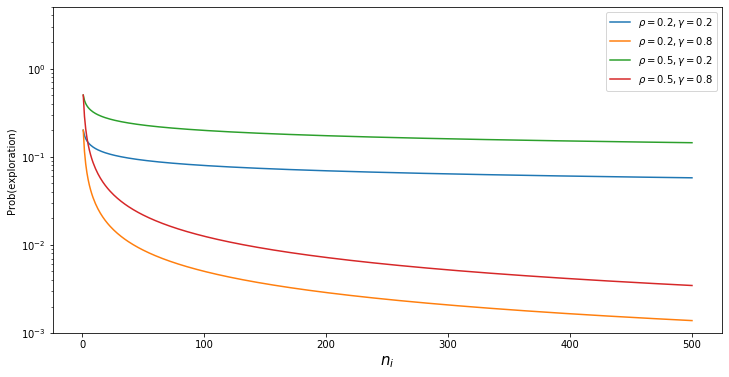

In [6]:
# rho, gamma
parameters = [
    #(0.4, 0.75), # Sweden
    #(0.9, 0.8), # SP
    #(0.9, 0.5), # SP, 
    #(0.6, 0.5), # SP, Netherlands
    #(0.3, 0.2),
    #(1.0, 0.8),
    (0.2, 0.2),
    (0.2, 0.8),
    (0.5, 0.2),
    (0.5, 0.8),

]

fig, ax = plt.subplots(1,1, figsize=(12,6))
for (rho, gamma) in parameters:
    ax.plot(xs, exploration_probability(xs, rho, gamma))
    
ax.legend([exploration_legend_typeset(rho, gamma) for (rho, gamma) in parameters])
ax.set_xlabel(r"$n_i$", fontsize=15)
ax.set_ylabel(r"Prob(exploration)")
ax.set_yscale('log')
ax.set_ylim([0.001, 5])

# Debiasing

In [7]:
geotweets = mscthesis.read_geotweets_raw("./../../dbs/sweden/geotweets.csv").set_index('userid')

In [8]:
usertweets = geotweets.loc[5616] # Has a lot of tweets so graphs will be pretty

In [9]:
# for zipf
region_counts = usertweets.groupby('region').size().sort_values(ascending=False)
region_probs = region_counts.to_frame(name="count").reset_index()
region_probs = region_probs.assign(
    probability= region_probs['count'] / region_probs['count'].sum()
)

# for distance
distance = np.linspace(1, 1000, 1000)

In [10]:
def zipf(region_range, s):
    probs = np.power(region_range+1, -s)
    probs = probs / np.sum(probs)
    return probs

def distance_preference(xs, beta):
    preference = np.exp(-beta*xs)
    preference = preference / np.sum(preference)
    return preference

### Visitation frequency

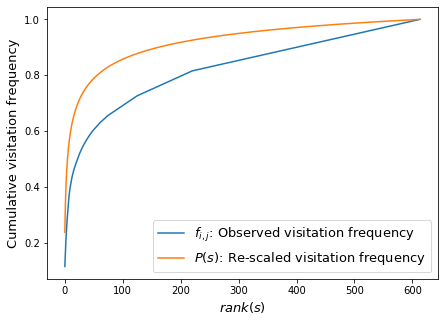

In [11]:
zipfss = [1.2]

fig, ax = plt.subplots(1,1, figsize=(7,5))

line, = ax.plot(region_probs.index, np.cumsum(region_probs.probability))
line.set_label(r"$f_{i,j}$: Observed visitation frequency")
for s in zipfss:
    line, = ax.plot(
        region_probs.index, # x
        np.cumsum(zipf(region_probs.index, s)), # y
    )
    line.set_label(r"$P(s)$: Re-scaled visitation frequency".format(s))

ax.set_xlabel(r"$rank(s)$", fontsize=13)
ax.set_ylabel("Cumulative visitation frequency", fontsize=13)

ax.legend(fontsize=13)

### Impedance to candidate places

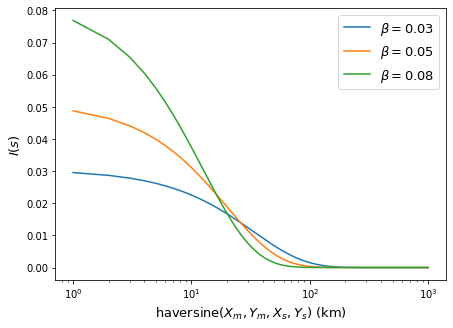

In [12]:
betas = [0.03, 0.05, 0.08]

fig, ax = plt.subplots(1,1, figsize=(7,5))

for beta in betas:
    line, = ax.plot(distance, distance_preference(distance, beta))
    line.set_label(r"$\beta = {}$".format(beta))

ax.set_xscale('log')

ax.set_xlabel(r"haversine($X_m, Y_m, X_s, Y_s$) (km)", fontsize=13)
ax.set_ylabel(r"$I(s)$", fontsize=13)

ax.legend(fontsize=13)

## Shift

In [13]:
usertweets

,region,createdat,tweetid,latitude,longitude,month,weekday,hourofday,timezone,ym,label,geometry
userid,,,,,,,,,,,,
5616,0,2015-05-07 15:12:52+00:00,596331871241379840,57.599221,18.436371,5,4,17,Europe/Stockholm,2015-05,other,POINT (18.43637 57.59922)
5616,0,2015-07-20 09:12:12+00:00,623057810864111616,57.599221,18.436371,7,1,11,Europe/Stockholm,2015-07,other,POINT (18.43637 57.59922)
5616,0,2015-12-23 14:43:00+00:00,679673567416565760,57.599221,18.436371,12,3,15,Europe/Stockholm,2015-12,other,POINT (18.43637 57.59922)
5616,0,2016-07-25 18:42:00+00:00,757647103011262465,57.599221,18.436371,7,1,20,Europe/Stockholm,2016-07,other,POINT (18.43637 57.59922)
5616,0,2016-08-10 06:31:05+00:00,763261365930909696,57.599221,18.436371,8,3,8,Europe/Stockholm,2016-08,other,POINT (18.43637 57.59922)
...,...,...,...,...,...,...,...,...,...,...,...,...
5616,610,2017-08-19 16:46:01+00:00,898949180906917889,60.172845,18.185741,8,6,18,Europe/Stockholm,2017-08,other,POINT (18.18574 60.17285)
5616,611,2017-08-27 12:58:26+00:00,901791011600519168,59.380944,18.180836,8,0,14,Europe/Stockholm,2017-08,other,POINT (18.18084 59.38094)
5616,612,2017-08-27 13:32:27+00:00,901799574330896384,59.362910,18.152143,8,0,15,Europe/Stockholm,2017-08,other,POINT (18.15214 59.36291)


In [14]:
bearing = models.DirectionTrueProb()
bearing.fit(usertweets)
jumpsize = models.JumpSizeTrueProb()
jumpsize.fit(usertweets)

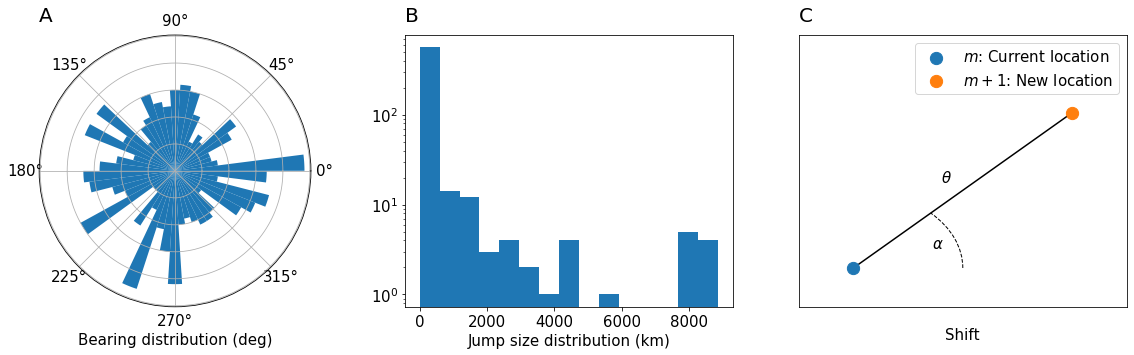

In [15]:
mpl.rcParams["font.size"] = 15
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131, polar=True)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.hist(np.radians(bearing.bearings), bins=50)
ax1.set_yticklabels([])
ax1.text(0, 1.05, "A", fontsize=20, transform=ax1.transAxes)
ax1.set_xlabel("Bearing distribution (deg)", fontsize=15)

distances = np.array(jumpsize.jump_sizes_km)
ax2.hist(distances, bins=15)
ax2.set_yscale('log')
ax2.set_xlabel("Jump size distribution (km)", fontsize=15)
ax2.text(0, 1.05, "B", fontsize=20, transform=ax2.transAxes)

ax3.plot([0,1], [0,1], color='black')
ax3.scatter(0, 0, label=r"$m$: Current location", zorder=3, s=150)
ax3.scatter(1,1, label=r"$m+1$: New location", zorder=3, s=150)
ax3.add_patch(Arc(
    (0,0), 
    1, 
    1,
    theta1=0,
    theta2=45,
    linestyle="--"
))
ax3.set_xlim([-0.25, 1.25])
ax3.set_ylim([-0.25, 1.5])
ax3.set_xticks([])
ax3.get_yaxis().set_visible(False)
ax3.text(0.36,0.13, r"$\alpha$")
ax3.text(0.4,0.55, r"$\theta$")
ax3.text(0, 1.05, "C", fontsize=20, transform=ax3.transAxes)
ax3.set_xlabel("Shift", fontsize=15, labelpad=20)
ax3.legend()

# Timeline hierarchy

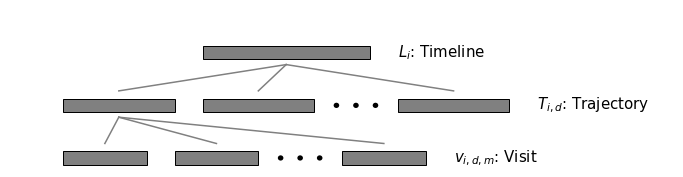

In [170]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.set_xlim([0, 12])
ax.set_ylim([6.9, 10])


box_style = { "facecolor": "grey", "edgecolor": "black"}

# Timeline L_i
ax.text(7, 9.05, r"$L_i$: Timeline")
ax.add_patch(Rectangle((3.5, 9), 3, .25, **box_style))

# Trajectories
ax.text(9.5, 8.05, r"$T_{i,d}$: Trajectory")
ax.add_patch(Rectangle((1, 8), 2, .25, **box_style))
ax.plot([2, 5], [8.4, 8.9], color='grey')
ax.add_patch(Rectangle((3.5, 8), 2, .25, **box_style))
ax.plot([4.5, 5], [8.4, 8.9], color='grey')

ax.add_patch(Circle((5.9, 8.125), .05, facecolor='black'))
ax.add_patch(Circle((6.25, 8.125), .05, facecolor='black'))
ax.add_patch(Circle((6.6, 8.125), .05, facecolor='black'))

ax.add_patch(Rectangle((7, 8), 2, .25, **box_style))
ax.plot([8, 5], [8.4, 8.9], color='grey', )


# Visits
ax.text(8, 7.05, r"$v_{i,d,m}$: Visit")
ax.add_patch(Rectangle((1, 7), 1.5, .25, **box_style))
ax.plot([1.75, 2], [7.4, 7.9], color='grey')
ax.add_patch(Rectangle((3, 7), 1.5, .25, **box_style))
ax.plot([3.75, 2], [7.4, 7.9], color='grey')

ax.add_patch(Circle((4.9, 7.125), .05, facecolor='black'))
ax.add_patch(Circle((5.25, 7.125), .05, facecolor='black'))
ax.add_patch(Circle((5.6, 7.125), .05, facecolor='black'))

ax.add_patch(Rectangle((6, 7), 1.5, .25, **box_style))
ax.plot([6.75, 2], [7.4, 7.9], color='grey')

ax.set_axis_off()